Exploratory Data Analysis
-

Для кейса 1: Рекомендации банковских продуктов.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)

df = pd.read_csv('dataset/train_ver2.csv')

# сразу исключаем столбец tipodom (в нём везде 1.0 как выяснилось ниже)
df = df.drop(['tipodom'], axis=1)

df_last_month = df[df['fecha_dato'] == "2016-05-28"]
products = [x for x in df.columns if '_ult1' in x]

/tmp/ipykernel_3915/1054543438.py:8: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset/train_ver2.csv')


Копирую сюда информацию о датасете:

У вас есть данные о поведении клиентов банка за 1,5 года — на их основе вы предскажете, какие новые продукты купят клиенты. Данные начинаются с 28 января 2015 года и содержат ежемесячные записи о продуктах, которые имеет клиент, например, «кредитная карта», «сберегательный счет» и т. д. Вы сможете предсказать, какие дополнительные продукты клиент получит в месяце 2016 года. Эти продукты представляют собой столбы с именами ind_(xyz)_ult1, которые идут с 25-ой по 48-ю колонку в обучающих данных.

In [4]:
df

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [5]:
df.dtypes

fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
ult_fec_cli_1t            object
indrel_1mes               object
tiprel_1mes               object
indresi                   object
indext                    object
conyuemp                  object
canal_entrada             object
indfall                   object
tipodom                  float64
cod_prov                 float64
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
segmento                  object
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_f

In [5]:
df.describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07,1.364731e+07,1.364731e+07,1.364731e+07,...,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.363125e+07,1.363125e+07,1.364731e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05,1.022912e-04,2.315475e-05,6.554837e-01,...,5.886582e-03,9.170965e-03,2.627404e-03,5.253636e-02,4.438868e-02,2.560761e-02,3.847718e-03,5.472434e-02,5.942854e-02,1.279162e-01
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05,1.011340e-02,4.811883e-03,4.752103e-01,...,7.649791e-02,9.532502e-02,5.119083e-02,2.231060e-01,2.059571e-01,1.579616e-01,6.191053e-02,2.274414e-01,2.364250e-01,3.339965e-01
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [2]:
# сразу исключаем столбец tipodom (в нём везде 1.0)
df = df.drop(['tipodom'], axis=1)

In [ ]:
# как выглядят данные об одном клиенте
df[df['ncodpers'] == 1375586]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1047196,2015-02-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1681276,2015-03-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2299297,2015-04-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2714121,2015-05-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1
3343336,2015-06-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1
4581564,2015-07-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1
5075380,2015-08-28,1375586,N,ES,H,36,2015-01-12,0.0,7,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
6258167,2015-09-28,1375586,N,ES,H,36,2015-01-12,0.0,8,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
6572487,2015-10-28,1375586,N,ES,H,36,2015-01-12,0.0,9,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [14]:
print("Кол-во уникальных дат срезов:", df['fecha_dato'].nunique())

Кол-во уникальных дат срезов: 17


Выяснил, что данные образованы таким образом: 28 числа каждого месяца по каждому клиенту происходит срез его состояния и записывается в строку этого датасета. 

Мы имеем данные по 17 таким срезам (почти полтора года).

In [17]:
amount_of_clients = df['ncodpers'].nunique()
amount_of_rows = df.shape[0]
mean_rows_per_client = amount_of_rows / float(amount_of_clients)
print("Среднее кол-во строк на клиента:", mean_rows_per_client)

Среднее кол-во строк на клиента: 14.265802884037443


In [2]:
# что по дубликатам?
duplicates = df[df.duplicated()]
duplicates

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1


In [4]:
df[df.duplicated(subset=df.columns.to_list().remove('ncodpers'))]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1


Все строки уникальны.

In [ ]:
# что по пропускам?
print(df.isnull().sum())

fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                             0
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
cod_prov                    93591
nomprov                     93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_ult1               0
ind_ctma_fin_u

In [29]:
products = [x for x in df.columns if '_ult1' in x]
print(df[products].isnull().sum())

ind_ahor_fin_ult1        0
ind_aval_fin_ult1        0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
ind_fond_fin_ult1        0
ind_hip_fin_ult1         0
ind_plan_fin_ult1        0
ind_pres_fin_ult1        0
ind_reca_fin_ult1        0
ind_tjcr_fin_ult1        0
ind_valo_fin_ult1        0
ind_viv_fin_ult1         0
ind_nomina_ult1      16063
ind_nom_pens_ult1    16063
ind_recibo_ult1          0
dtype: int64


Определенно есть пустые клетки, благо в продуктах их почти нет.

In [39]:
# взглянем в смешанные типы
df['antiguedad'].unique()

array(['      6', '     35', '     34', '     NA', '     33', '     31',
       '     21', '     16', '     27', '      9', '     22', '     13',
       '     29', '      8', '     11', '     10', '     28', '     24',
       '      7', '     25', '     14', '     26', '     12', '     23',
       '      1', '     18', '      4', '      3', '     17', '     32',
       '     30', '     20', '     15', '     19', '    157', '     36',
       '      5', '     40', '     38', '     37', '     39', '      0',
       '      2', '     47', '     44', '     42', '     46', '     45',
       '     43', '     41', '     57', '     48', '     52', '     49',
       '     50', '     56', '     58', '     51', '     55', '     54',
       '     53', '     59', '     62', '     61', '     60', '     63',
       '    139', '    165', '    118', '    164', '    142', '     94',
       '    159', '    143', '    105', '    151', '    162', '    137',
       '    150', '    128', '    122', '    156', 

In [40]:
df['age'].unique()

array([' 35', ' 23', ' 22', ' 24', ' 65', ' 28', ' 25', ' 26', ' 53',
       ' 27', ' 32', ' 37', ' 31', ' 39', ' 63', ' 33', ' 55', ' 42',
       ' 58', ' 38', ' 50', ' 30', ' 45', ' 44', ' 36', ' 29', ' 60',
       ' 57', ' 67', ' 47', ' NA', ' 34', ' 48', ' 46', ' 54', ' 84',
       ' 15', ' 12', '  8', '  6', ' 83', ' 40', ' 77', ' 69', ' 52',
       ' 59', ' 43', ' 10', '  9', ' 49', ' 41', ' 51', ' 78', ' 16',
       ' 11', ' 73', ' 62', ' 66', ' 17', ' 68', ' 82', ' 95', ' 96',
       ' 56', ' 61', ' 79', ' 72', ' 14', ' 19', ' 13', ' 86', ' 64',
       ' 20', ' 89', ' 71', '  7', ' 70', ' 74', ' 21', ' 18', ' 75',
       '  4', ' 80', ' 81', '  5', ' 76', ' 92', ' 93', ' 85', ' 91',
       ' 87', ' 90', ' 94', ' 99', ' 98', ' 88', ' 97', '100', '101',
       '106', '103', '  3', '  2', '102', '104', '111', '107', '109',
       '105', '112', '115', '110', '116', '108', '113', 37, 81, 43, 30,
       45, 41, 67, 59, 46, 36, 47, 69, 39, 44, 40, 38, 34, 42, 31, 35, 48,
       60, 54

In [41]:
df['indrel_1mes'].unique()

array([1.0, nan, 3.0, 2.0, '1.0', '1', '3', '3.0', '2.0', '4.0', 'P', '4',
       4.0, '2'], dtype=object)

In [42]:
df['conyuemp'].unique()

array([nan, 'N', 'S'], dtype=object)

In [18]:
df[['ncodpers', 'ind_empleado', 'pais_residencia', 'fecha_alta', 'ind_nuevo', 'indrel', 'indresi', 'indext', 'indfall', 'cod_prov', 'nomprov']]

,ncodpers,ind_empleado,pais_residencia,fecha_alta,ind_nuevo,indrel,indresi,indext,indfall,cod_prov,nomprov
0,1375586,N,ES,2015-01-12,0.0,1.0,S,N,N,29.0,MALAGA
1,1050611,N,ES,2012-08-10,0.0,1.0,S,S,N,13.0,CIUDAD REAL
2,1050612,N,ES,2012-08-10,0.0,1.0,S,N,N,13.0,CIUDAD REAL
3,1050613,N,ES,2012-08-10,0.0,1.0,S,N,N,50.0,ZARAGOZA
4,1050614,N,ES,2012-08-10,0.0,1.0,S,N,N,50.0,ZARAGOZA
...,...,...,...,...,...,...,...,...,...,...,...
13647304,1166765,N,ES,2013-08-14,0.0,1.0,S,N,N,50.0,ZARAGOZA
13647305,1166764,N,ES,2013-08-14,0.0,1.0,S,N,N,26.0,"RIOJA, LA"
13647306,1166763,N,ES,2013-08-14,0.0,1.0,S,N,N,50.0,ZARAGOZA
13647307,1166789,N,ES,2013-08-14,0.0,1.0,S,N,N,50.0,ZARAGOZA


Графики
-

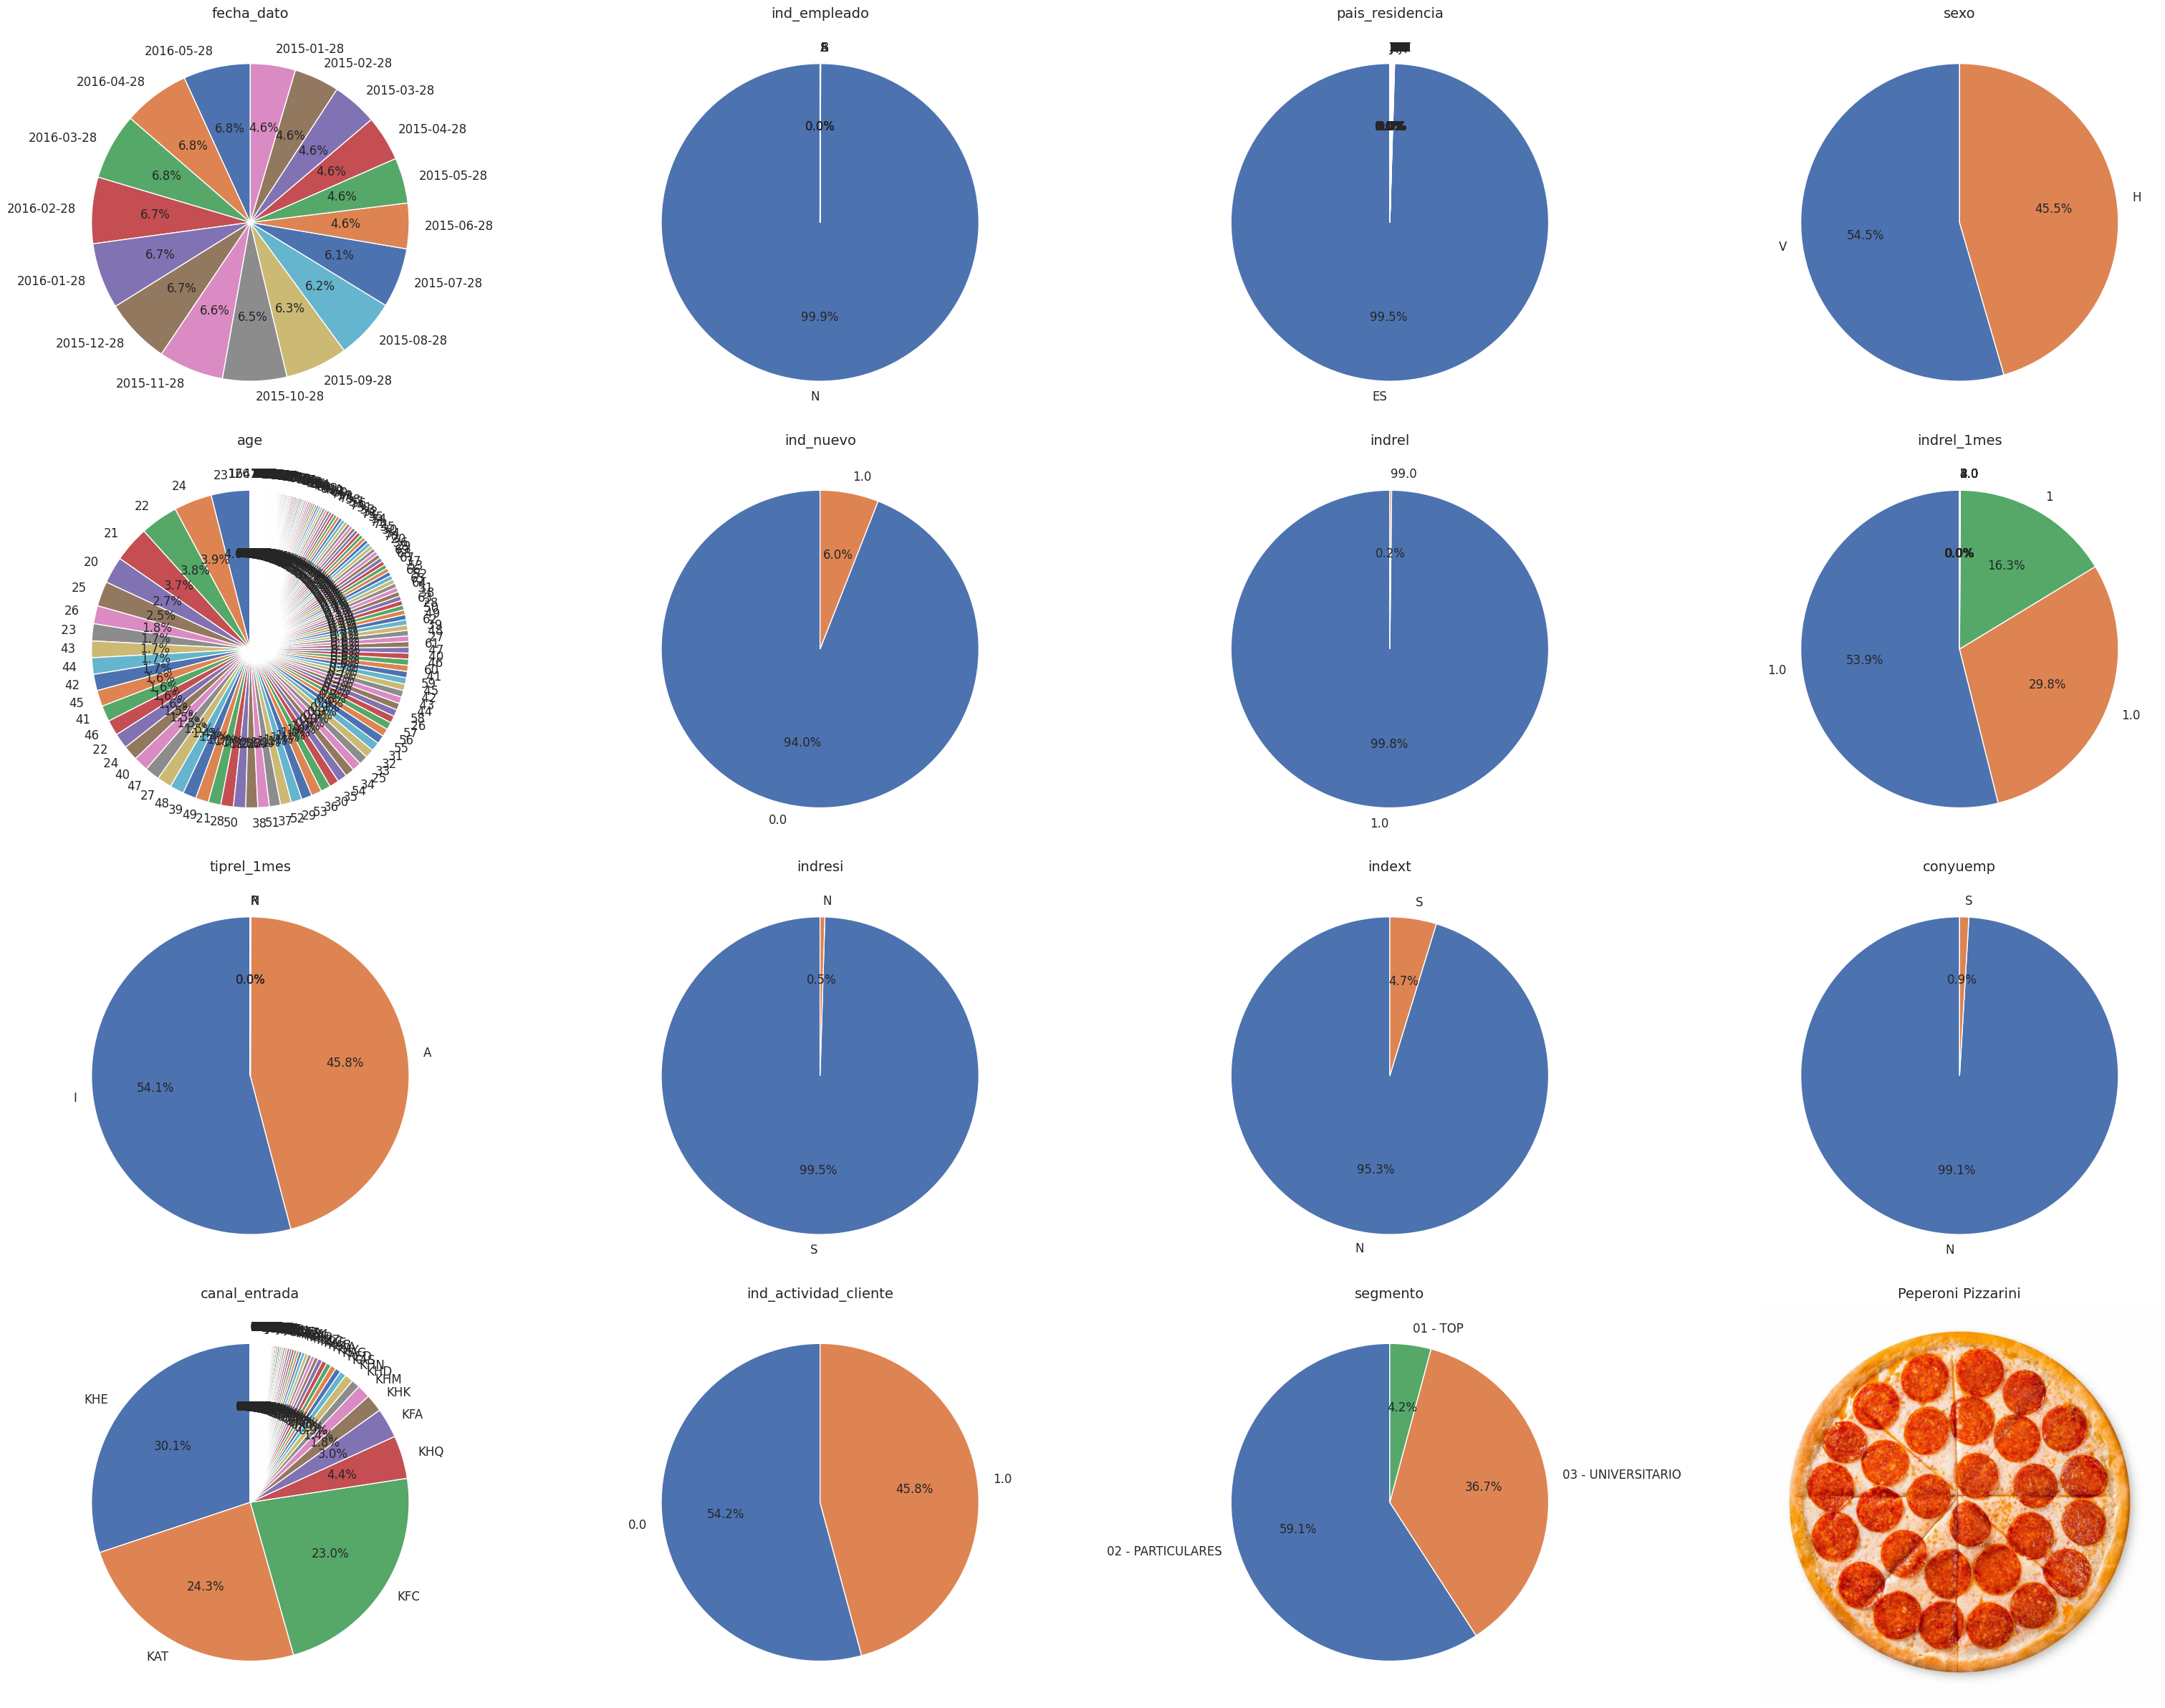

In [ ]:
# Выбираем категориальные столбцы
categorical_columns = ['fecha_dato', 
                 'ind_empleado', 
                 'pais_residencia', 
                 'sexo', 
                 'age', 
                 'ind_nuevo', 
                 #'antiguedad', 
                 'indrel', 
                 'indrel_1mes',
                 'tiprel_1mes',
                 'indresi',
                 'indext',
                 'conyuemp',
                 'canal_entrada',
                 'ind_actividad_cliente',
                 'segmento']

# Настройки расположения
n_cols = 4  # Желаемое число столбцов (можно менять)
n_rows = int(np.ceil(len(categorical_columns) / n_cols))  # Автоподбор строк

# Размер фигуры (подбирается экспериментально)
fig, axes = plt.subplots(n_rows, n_cols, 
                        figsize=(8 * n_cols, 6 * n_rows),  # Ширина x Высота
                        squeeze=False)
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    counts = df[column].value_counts()
    if len(counts) > 0:
        axes[i].pie(counts, 
                  labels=counts.index, 
                  autopct='%1.1f%%',
                  startangle=90,
                  textprops={'fontsize': 12})  # Размер шрифта
        axes[i].set_title(column, fontsize=14)
    else:
        axes[i].text(0.5, 0.5, 'No data', ha='center', va='center')

# Скрываем пустые оси
for j in range(len(categorical_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Далее я банально посмотрю графики плотности распределения по `renta` за последний месяц

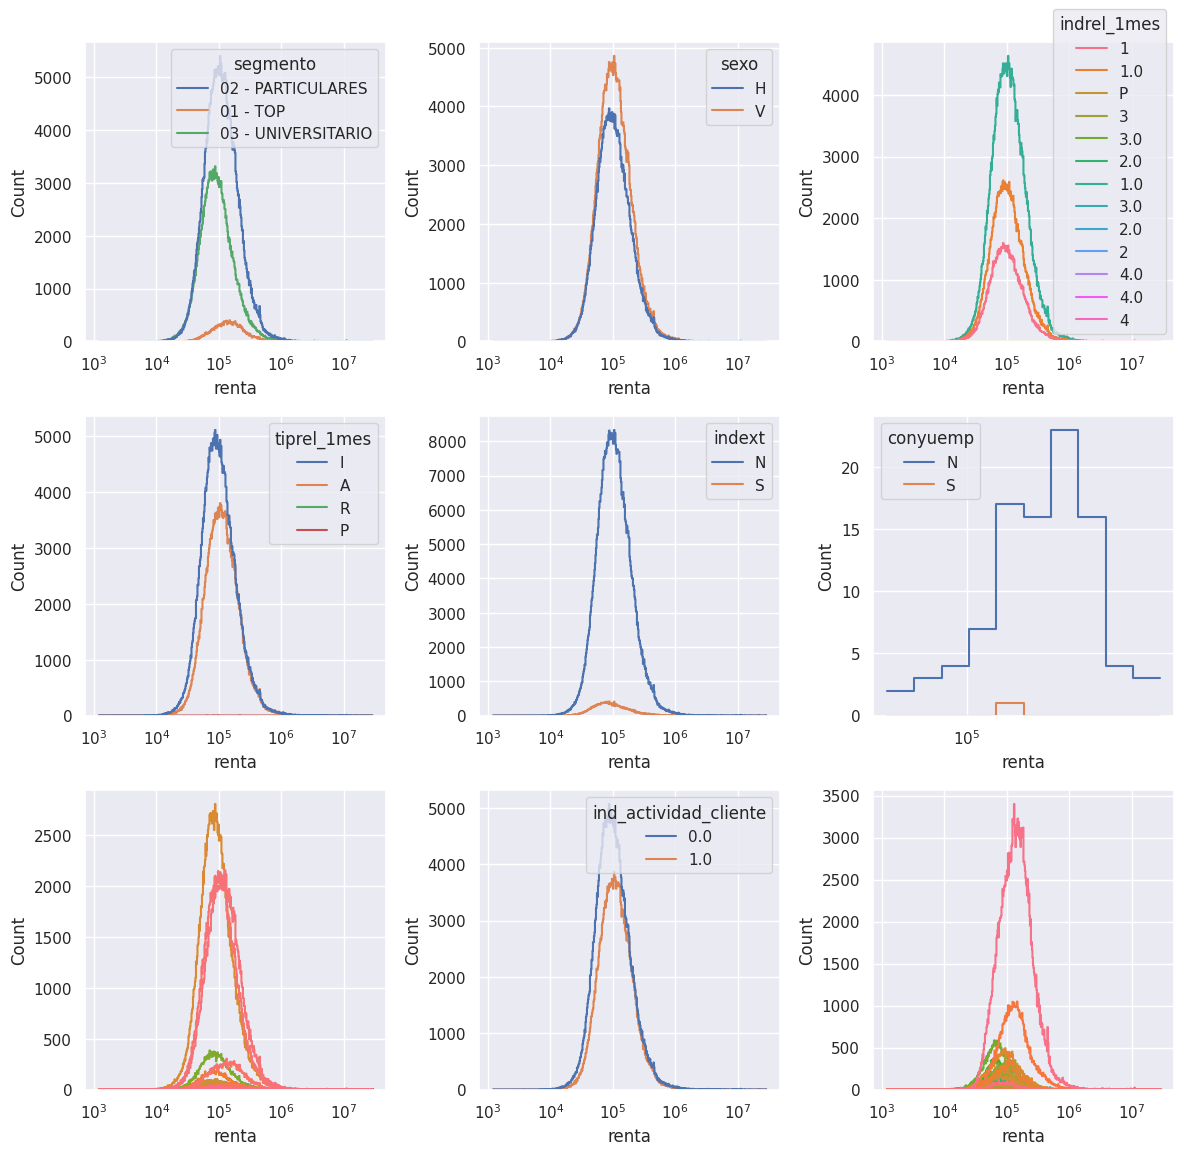

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

for i, col in enumerate([
    'segmento',
    'sexo',
    'indrel_1mes',
    'tiprel_1mes',
    'indext',
    'conyuemp',
    'canal_entrada',
    'ind_actividad_cliente',
    'nomprov'
    ]):
    sns.histplot(data=df_last_month, x='renta', hue=col, log_scale=10, element='step', fill=False, common_norm=False, ax=axes.flat[i], legend=(col not in ['canal_entrada', 'nomprov']))

plt.tight_layout()
plt.show()

Популярность продуктов банка за последний месяц

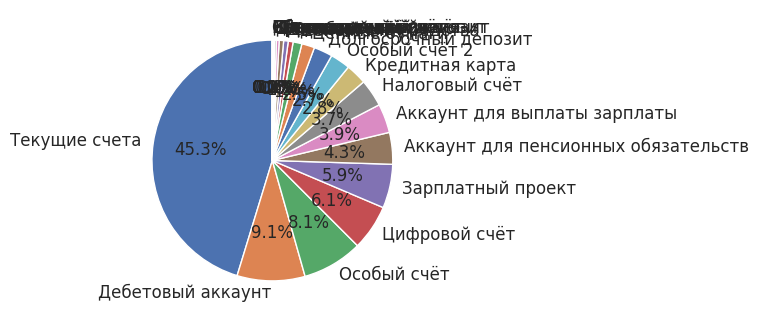

Текущие счета                          561615.0
Дебетовый аккаунт                      113050.0
Особый счёт                            100589.0
Цифровой счёт                           75845.0
Зарплатный проект                       73061.0
Аккаунт для пенсионных обязательств     52848.0
Аккаунт для выплаты зарплаты            48309.0
Налоговый счёт                          45535.0
Кредитная карта                         34822.0
Особый счёт 2                           33271.0
Долгосрочный депозит                    31217.0
Ценные бумаги                           21426.0
Денежный средства                       14687.0
Особый счёт 3                            8097.0
Детский счёт                             7581.0
Пенсионный план                          7359.0
Ипотека                                  4528.0
Домашний счёт                            2959.0
Кредит                                   1991.0
Среднесрочный депозит                    1021.0
Краткосрочный депозит                   

In [17]:
products_spanish_to_ru_dict = {
    'ind_ahor_fin_ult1':	'Сберегательный счёт',
    'ind_aval_fin_ult1':	'Банковская гарантия',
    'ind_cco_fin_ult1':	'Текущие счета',
    'ind_cder_fin_ult1':	'Деривативный счёт',
    'ind_cno_fin_ult1':	'Зарплатный проект',
    'ind_ctju_fin_ult1':	'Детский счёт',
    'ind_ctma_fin_ult1':	'Особый счёт 3',
    'ind_ctop_fin_ult1':	'Особый счёт',
    'ind_ctpp_fin_ult1':	'Особый счёт 2',
    'ind_deco_fin_ult1':	'Краткосрочный депозит',
    'ind_deme_fin_ult1':	'Среднесрочный депозит',
    'ind_dela_fin_ult1':	'Долгосрочный депозит',
    'ind_ecue_fin_ult1':	'Цифровой счёт',
    'ind_fond_fin_ult1':	'Денежный средства',
    'ind_hip_fin_ult1':	'Ипотека',
    'ind_plan_fin_ult1':	'Пенсионный план',
    'ind_pres_fin_ult1':	'Кредит',
    'ind_reca_fin_ult1':	'Налоговый счёт',
    'ind_tjcr_fin_ult1':	'Кредитная карта',
    'ind_valo_fin_ult1':	'Ценные бумаги',
    'ind_viv_fin_ult1':	'Домашний счёт',
    'ind_nomina_ult1':	'Аккаунт для выплаты зарплаты',
    'ind_nom_pens_ult1':	'Аккаунт для пенсионных обязательств',
    'ind_recibo_ult1':	'Дебетовый аккаунт',
}

products = [x for x in df.columns if '_ult1' in x]
products_stats = df_last_month[products].sum().sort_values(ascending=False).rename(products_spanish_to_ru_dict)

plt.pie(products_stats, 
    labels=products_stats.keys(), 
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12},
    )

plt.tight_layout()
plt.show()

products_stats

<Axes: >

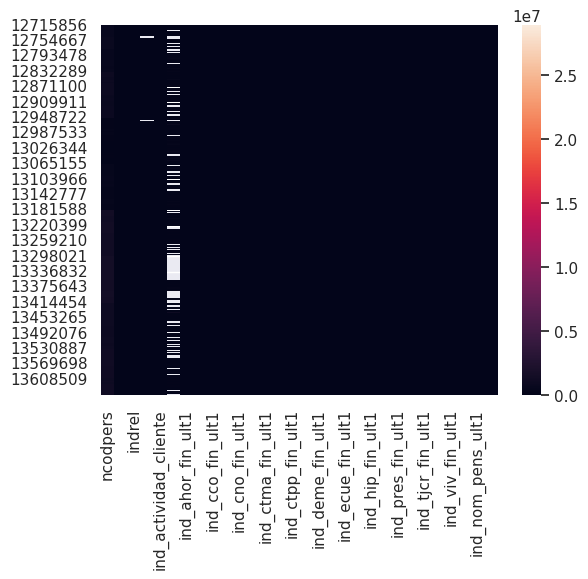

In [ ]:
#TODO
sns.heatmap(df_last_month.select_dtypes(include='number'))

In [6]:
# интересны ли нам неактивные клиенты?
df[df['ind_actividad_cliente'] == 0.0].describe()

,ncodpers,ind_nuevo,indrel,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,7.384390e+06,7.384390e+06,7.384390e+06,7.355161e+06,7384390.0,5.759618e+06,7.384390e+06,7384390.0,7.384390e+06,7.384390e+06,...,7.384390e+06,7.384390e+06,7.384390e+06,7.384390e+06,7.384390e+06,7.384390e+06,7.384390e+06,7.384328e+06,7.384328e+06,7.384390e+06
mean,8.908045e+05,6.048489e-02,1.305185e+00,2.624090e+01,0.0,1.283379e+05,5.064738e-05,0.0,5.820125e-01,6.784582e-05,...,2.654248e-05,9.614877e-05,8.503072e-04,6.444811e-03,4.605661e-04,4.715352e-04,1.586861e-03,2.950844e-04,3.408570e-04,1.514952e-03
std,4.095704e+05,2.383830e-01,5.460315e+00,1.328619e+01,0.0,2.185898e+05,7.116517e-03,0.0,4.932281e-01,8.236579e-03,...,5.151871e-03,9.805077e-03,2.914763e-02,8.002048e-02,2.145586e-02,2.170974e-02,3.980381e-02,1.717549e-02,1.845917e-02,3.889290e-02
min,1.589100e+04,0.000000e+00,1.000000e+00,1.000000e+00,0.0,1.202730e+03,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.615040e+05,0.000000e+00,1.000000e+00,1.400000e+01,0.0,6.512145e+04,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.853210e+05,0.000000e+00,1.000000e+00,2.800000e+01,0.0,9.587991e+04,0.000000e+00,0.0,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.210684e+06,0.000000e+00,1.000000e+00,3.500000e+01,0.0,1.473895e+05,0.000000e+00,0.0,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.553689e+06,1.000000e+00,9.900000e+01,5.200000e+01,0.0,2.889440e+07,1.000000e+00,0.0,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Выводы
-

Общие выводы:
- 13.6 миллиона записей;
- данные на испанском языке;
- данные представляют из себя ежемесячный срез по всем клиентам банка;
- дубликатов нет;
- есть много пустых ячеек;
- у неактивных клиентов есть активные продукты;
- предположительная ML-задача - мультиклассовая классификация с пересекающимися классами.

Выводы по признакам:
- `fecha_dato`                object - дата среза данных, удалить перед обучением, либо конвертировать в int время в секундах, либо сгенерировать номер месяца (1 - 12).
- `ncodpers`                   int64 - id клиента, удалить перед обучением.
- `ind_empleado`              object - категориальный признак, 27к пропусков.
- `pais_residencia`           object - категориальный признак, 27к пропусков.
- `sexo`                      object - категориальный бинарный признак.
- `age`                       object - численный признак, строки перевести в int, почистить от ' NA', клиент с возрастом 160 лет?
- `fecha_alta`                object - тип дата, 27к пропусков, что-то сгенерировать отсюда?
- `ind_nuevo`                float64 - категориальный бинарный признак, 27к пропусков.
- `antiguedad`                object - численный признак, надо строки конвертировать в int, и почистить от значений типа '     NA', -999999.
- `indrel`                   float64 - категориальный бинарный признак, 27к пропусков.
- `ult_fec_cli_1t`            object - 13.6 миллионов пропусков, удалить?
- `indrel_1mes`               object - категориальный признак, 149к пропусков, намешаны разные типы, надо привести к одному типу 2.0 '2.0' '2' итп, что делать с пропусками?
- `tiprel_1mes`               object - категориальный признак, 149к пропусков, неизвестная категория 'N', что делать с пропусками?
- `indresi`                   object - категориальный бинарный признак, 27к пропусков.
- `indext`                    object - категориальный бинарный признак, 27к пропусков.
- `conyuemp`                  object - 13.6 миллионов пропусков, удалить?
- `canal_entrada`             object - потенциально очень хороший категориальный признак.
- `indfall`                   object - категориальный бинарный признак, 27к пропусков.
- `tipodom`                  float64 - бесполезен, УДАЛИТЬ.
- `cod_prov`                 float64 - численный признак, 93к пропусков.
- `nomprov`                   object - категориальный признак, 93к пропусков, делит клиентов по регионам Испании?
- `ind_actividad_cliente`    float64 - категориальный бинарный признак.
- `renta`                    float64 - численный признак, 2.8 миллиона пропусков.
- `segmento`                  object - категориальный признак.

Выводы по таргетам:
- таргеты привести к единому типу int или float
- есть пропуски по 16к в `ind_nomina_ult1` и `ind_nom_pens_ult1`, удалить эти строки?